In [3]:
!pip install psycopg2-binary 
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 9.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.3 MB/s eta 0:00:0000:0100:01


In [4]:
from query_API import *
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
real_time_df = query_from_db("Select * From chainlink_real_time")

In [6]:
real_time_df

,roundid,price,startedat,updatedat,answeredinround,pair,decimals
0,92233720368547791947,2843439000000,2023-04-01 00:55:23,2023-04-01 00:55:23,92233720368547791947,BTC / USD,8
1,92233720368547791948,2858579310000,2023-04-01 01:52:59,2023-04-01 01:52:59,92233720368547791948,BTC / USD,8
2,92233720368547791949,2856487000000,2023-04-01 01:55:23,2023-04-01 01:55:23,92233720368547791949,BTC / USD,8
3,92233720368547791950,2873735176046,2023-04-01 02:01:59,2023-04-01 02:01:59,92233720368547791950,BTC / USD,8
4,92233720368547791951,2858900000000,2023-04-01 02:18:23,2023-04-01 02:18:23,92233720368547791951,BTC / USD,8
...,...,...,...,...,...,...,...
428,92233720368547792375,3044323000000,2023-04-13 17:55:47,2023-04-13 17:55:47,92233720368547792375,BTC / USD,8
429,92233720368547792376,3050172000000,2023-04-13 18:55:47,2023-04-13 18:55:47,92233720368547792376,BTC / USD,8
430,92233720368547792377,3035810230600,2023-04-13 19:56:47,2023-04-13 19:56:47,92233720368547792377,BTC / USD,8
431,92233720368547792378,3035950436684,2023-04-13 19:59:11,2023-04-13 19:59:11,92233720368547792378,BTC / USD,8


In [7]:
history_df = query_from_db("Select * From chainlink_history")

In [8]:
history_df

,roundid,price,startedat,updatedat,answeredinround,pair,decimals
0,92233720368547771281,4652109401959,2021-12-31 22:13:16,2021-12-31 22:13:16,92233720368547771281,BTC / USD,8
1,92233720368547771282,4639357085285,2021-12-31 22:55:11,2021-12-31 22:55:11,92233720368547771282,BTC / USD,8
2,92233720368547771283,4635816164458,2021-12-31 23:56:36,2021-12-31 23:56:36,92233720368547771283,BTC / USD,8
3,92233720368547771284,4661544706500,2022-01-01 00:42:51,2022-01-01 00:42:51,92233720368547771284,BTC / USD,8
4,92233720368547771285,4670395911240,2022-01-01 00:56:01,2022-01-01 00:56:01,92233720368547771285,BTC / USD,8
...,...,...,...,...,...,...,...
20661,92233720368547791942,2849260000000,2023-03-31 19:55:47,2023-03-31 19:55:47,92233720368547791942,BTC / USD,8
20662,92233720368547791943,2844239500000,2023-03-31 20:55:47,2023-03-31 20:55:47,92233720368547791943,BTC / USD,8
20663,92233720368547791944,2852083300000,2023-03-31 21:55:47,2023-03-31 21:55:47,92233720368547791944,BTC / USD,8
20664,92233720368547791945,2857468500000,2023-03-31 22:55:23,2023-03-31 22:55:23,92233720368547791945,BTC / USD,8


In [9]:
df = pd.concat([history_df, real_time_df], ignore_index=True)

In [10]:
df

,roundid,price,startedat,updatedat,answeredinround,pair,decimals
0,92233720368547771281,4652109401959,2021-12-31 22:13:16,2021-12-31 22:13:16,92233720368547771281,BTC / USD,8
1,92233720368547771282,4639357085285,2021-12-31 22:55:11,2021-12-31 22:55:11,92233720368547771282,BTC / USD,8
2,92233720368547771283,4635816164458,2021-12-31 23:56:36,2021-12-31 23:56:36,92233720368547771283,BTC / USD,8
3,92233720368547771284,4661544706500,2022-01-01 00:42:51,2022-01-01 00:42:51,92233720368547771284,BTC / USD,8
4,92233720368547771285,4670395911240,2022-01-01 00:56:01,2022-01-01 00:56:01,92233720368547771285,BTC / USD,8
...,...,...,...,...,...,...,...
21094,92233720368547792375,3044323000000,2023-04-13 17:55:47,2023-04-13 17:55:47,92233720368547792375,BTC / USD,8
21095,92233720368547792376,3050172000000,2023-04-13 18:55:47,2023-04-13 18:55:47,92233720368547792376,BTC / USD,8
21096,92233720368547792377,3035810230600,2023-04-13 19:56:47,2023-04-13 19:56:47,92233720368547792377,BTC / USD,8
21097,92233720368547792378,3035950436684,2023-04-13 19:59:11,2023-04-13 19:59:11,92233720368547792378,BTC / USD,8


In [12]:
df['updatedAt'] = pd.to_datetime(df['updatedat'])
df['startedat'] = pd.to_datetime(df['startedat'])

In [15]:
#Choose the numeric columns for which you want to detect anomalies
numeric_columns = df.select_dtypes(include=['number']).columns

# Fit the Isolation Forest model on the selected columns
model = IsolationForest(contamination=0.01)  # Adjust contamination parameter as needed
model.fit(df[numeric_columns])

# Get anomaly predictions
anomaly_predictions = model.predict(df[numeric_columns])

# Add a new column to the DataFrame indicating whether each row is an anomaly
df['anomaly'] = anomaly_predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [17]:
df = df.sort_values(by='updatedAt')
df['color'] = df['anomaly'].apply(lambda x: 'red' if x == -1 else 'blue')

/tmp/ipykernel_160/1739530397.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  line_plot = sns.lineplot(x='updatedAt', y='price', data=df, hue='color', palette=['blue', 'red'], legend=False)


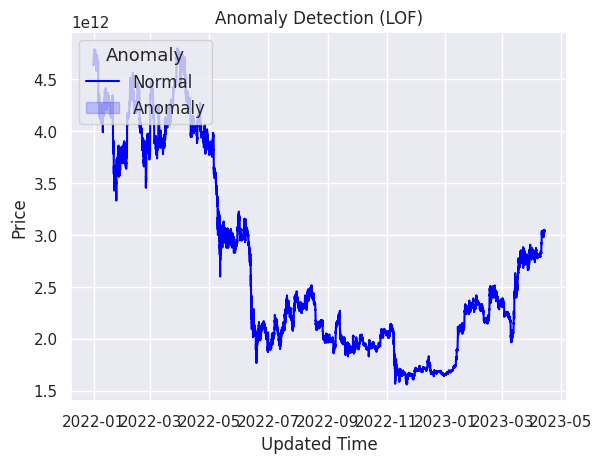

In [18]:
# Set the Seaborn theme for a professional look
sns.set_theme()

# Create a line plot with the 'updatedAt' column on the x-axis and the 'price' column on the y-axis
line_plot = sns.lineplot(x='updatedAt', y='price', data=df, hue='color', palette=['blue', 'red'], legend=False)
line_plot.set(xlabel='Updated Time', ylabel='Price', title='Anomaly Detection (LOF)')

# Add a legend
plt.legend(title='Anomaly', title_fontsize='13', loc='upper left', labels=['Normal', 'Anomaly'], fontsize='12')

# Show the plot
plt.show()

In [19]:
anomalies = df.loc[df['anomaly'] == -1]

In [21]:
# Choose the numeric columns for which you want to detect anomalies
numeric_columns = df.select_dtypes(include=['number']).columns

# Fit the Local Outlier Factor model on the selected columns
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Adjust the parameters as needed
anomaly_scores = model.fit_predict(df[numeric_columns])

# Add a new column to the DataFrame indicating whether each row is an anomaly
df['anomaly'] = anomaly_scores

In [23]:
print(f'Number of duplicate records: {df.duplicated().sum()}')
df = df.drop_duplicates()

print('Missing values:')
print(df.isnull().sum())

# Step 4: Check and correct data types
print('Data types:')
print(df.dtypes)
df['updatedAt'] = pd.to_datetime(df['updatedAt'])

# Step 5: Check for and handle outliers
numeric_columns = df.select_dtypes(include=['number']).columns
model = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # Adjust the parameters as needed
anomaly_scores = model.fit_predict(df[numeric_columns])
df['outlier'] = anomaly_scores
outliers = df.loc[df['outlier'] == -1]
print('Outliers:')
print(outliers)

Number of duplicate records: 0
Missing values:
roundid            0
price              0
startedat          0
updatedat          0
answeredinround    0
pair               0
decimals           0
updatedAt          0
anomaly            0
color              0
dtype: int64
Data types:
roundid                    object
price                      object
startedat          datetime64[ns]
updatedat          datetime64[ns]
answeredinround            object
pair                       object
decimals                    int64
updatedAt          datetime64[ns]
anomaly                     int64
color                      object
dtype: object


KeyboardInterrupt: 

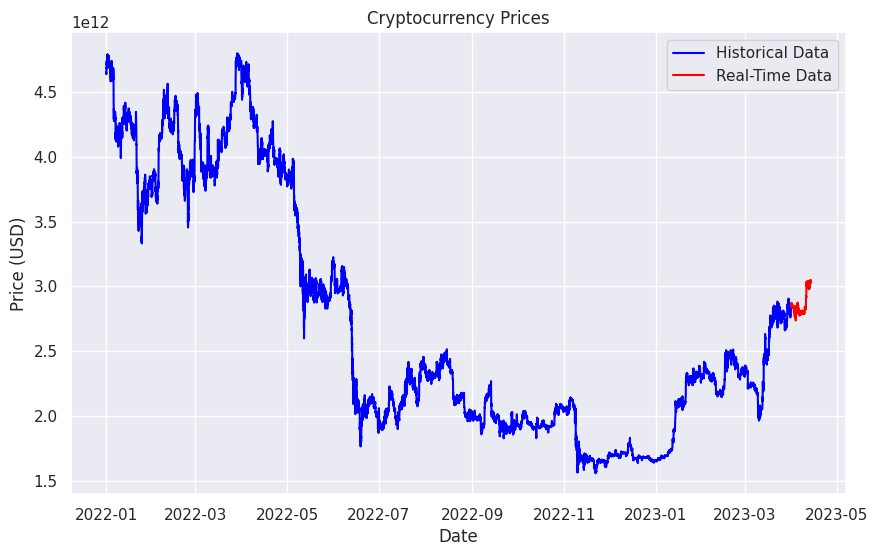

In [25]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot historical data
ax.plot(history_df['updatedat'], history_df['price'], label='Historical Data', color='blue')

# Plot real-time data
ax.plot(real_time_df['updatedat'], real_time_df['price'], label='Real-Time Data', color='red')

# Customize the plot
ax.set_title('Cryptocurrency Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')
ax.legend()

# Show the plot
plt.show()